<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

## 02 Exploratory Data Analysis (EDA) & Data Cleaning

> SG-DSI-41 Group 01: Daryl Chia, Germaine Choo, Sharifah Nurulhuda, Tan Wei Chiong

---

## 01 Import Libraries

In [1]:
# Import libraries, modules, and functions:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import enchant

#to install pyenchant: #!pip install pyenchant

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

## 02 Load & Check Data

### 02.01 Load & Check Data

In [2]:
# Load data:
comments = pd.read_csv('../data/comments.csv')

# Increase data frame column width:
pd.set_option('max_colwidth', 400)

# Check data:
print(comments.shape)
comments.head()

(86210, 6)


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
0,18ay2s2,kc10fzs,Watch their kid just become like an accountant.,1092,34,0
1,18ay2s2,kc1bowr,"Can you imagine the bragging rights at school?\n\nRandom kid: My dad is a doctor!!!\n\n**The kid**: My grandpa was KURT COBAIN!!!! \n\nRandom kid: Oh yeah, well... my mom knows an influencer.\n\n**The kid**: My other grandpa is TONY HAWK!!!!\n\n\----- silence-----",304,9,0
2,18ay2s2,kc12zpc,They both look like their dads.,226,8,0
3,18ay2s2,kc11j9m,The Sacred One shall be birthed anew,144,1,0
4,18ay2s2,kc0zrs8,The world is so small yet so big at the same time.,59,2,0


 **Columns of Interest**
 - Reddit subreddit comments: `comment_text`
 - Generation indicator: `generation_z`
   - 1: **Generation Z**
   - 0: **Millennials**

### 02.02 Check Data Information & for Null Values

In [3]:
# Check data info:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86210 entries, 0 to 86209
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   thread_id        86210 non-null  object
 1   comment_id       86210 non-null  object
 2   comment_text     86209 non-null  object
 3   comment_score    86210 non-null  int64 
 4   comment_replies  86210 non-null  int64 
 5   generation_z     86210 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [4]:
# Check data for null values:
comments.isnull().sum()

thread_id          0
comment_id         0
comment_text       1
comment_score      0
comment_replies    0
generation_z       0
dtype: int64

In [5]:
# Check data for null values in column 'comment_text':
comments[comments['comment_text'].isnull()]

,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
85847,18v71ha,kfpttq6,NaN,1,0,1


### 02.03 Check for Substrings to Clean

In [6]:
# Check for data in column 'comment_text' that contain substring '[deleted]':
print(comments['comment_text'].str.contains(r'\[deleted\]').value_counts())
comments[comments['comment_text'].str.contains(r'\[deleted\]') == True].head()

comment_text
False    85327
True       882
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
23,18ay2s2,kc1pw55,[deleted],3,1,0
33,18ay2s2,kc28kfe,[deleted],2,2,0
236,18ay2s2,kc2sk5v,[deleted],7,1,0
397,18ay2s2,kc2ga5p,[deleted],1,1,0
452,18ay2s2,kc25fnx,[deleted],3,1,0


In [7]:
# Check for data in column 'comment_text' that contain substring '[removed]':
print(comments['comment_text'].str.contains(r'\[removed\]').value_counts())
comments[comments['comment_text'].str.contains(r'\[removed\]') == True].head()

comment_text
False    86076
True       133
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
1138,182z60u,kancpn8,[removed],3,0,0
3053,185wkry,kb4f86w,[removed],44,3,0
3197,185wkry,kb4gz7j,[removed],13,1,0
4899,18al0tm,kc036ex,[removed],31,1,0
6280,1890xqk,kbom31u,[removed],-5,1,0


In [8]:
# Check for data in column 'comment_text' that contain bot comments:
print(comments['comment_text'].str.contains(r'I am a bot.|I\'m a bot.').value_counts())
comments[comments['comment_text'].str.contains(r'I am a bot.|I\'m a bot.') == True].head()

comment_text
False    86147
True        62
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
22960,17cc1fr,k5scaav,"> to be *paid* and mc\n\nFTFY.\n\nAlthough *payed* exists (the reason why autocorrection didn't help you), it is only correct in:\n\n * Nautical context, when it means to paint a surface, or to cover with something like tar or resin in order to make it waterproof or corrosion-resistant. *The deck is yet to be payed.*\n\n * *Payed out* when letting strings, cables or ropes out, by slacking them...",1,0,0
35379,190rvji,kgq5ng6,"It looks like OP posted an AMP link. These should load faster, but AMP is controversial because of [concerns over privacy and the Open Web](https://www.reddit.com/r/AmputatorBot/comments/ehrq3z/why_did_i_build_amputatorbot).\n\nMaybe check out **the canonical page** instead: **[https://www.dailymail.co.uk/news/article-12934883/Wall-Street-backed-landlord-buys-264-Las-Vegas-homes-98M-deal-Sin-C...",2,0,0
44399,1803qx6,ka3xiou,"> and haven't *paid* for childcare\n\nFTFY.\n\nAlthough *payed* exists (the reason why autocorrection didn't help you), it is only correct in:\n\n * Nautical context, when it means to paint a surface, or to cover with something like tar or resin in order to make it waterproof or corrosion-resistant. *The deck is yet to be payed.*\n\n * *Payed out* when letting strings, cables or ropes out, by ...",4,0,0
46767,17se109,k8p6uim,"It looks like OP posted an AMP link. These should load faster, but AMP is controversial because of [concerns over privacy and the Open Web](https://www.reddit.com/r/AmputatorBot/comments/ehrq3z/why_did_i_build_amputatorbot). Fully cached AMP pages (like the one OP posted), are [especially problematic](https://www.reddit.com/r/AmputatorBot/comments/ehrq3z/why_did_i_build_amputatorbot).\n\nMaybe...",1,0,0
48145,18zc3op,kggheri,"We are looking for moderators! If you're interested, read [here](https://www.reddit.com/r/GenZ/comments/18qppgo/rgenz_is_in_need_of_more_moderators_read_below)!\n\nDid you know we have a Discord server‽ You can join by clicking [here](https://discord.gg/NWE6JS5rh9)! \n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compos...",1,0,1


In [9]:
# Check for data in column 'comment_text' that contain line or tab characters:
print(comments['comment_text'].str.contains(r'\r|\t|\n').value_counts())
comments[comments['comment_text'].str.contains(r'\r|\t|\n') == True].head()

comment_text
False    67225
True     18984
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
1,18ay2s2,kc1bowr,"Can you imagine the bragging rights at school?\n\nRandom kid: My dad is a doctor!!!\n\n**The kid**: My grandpa was KURT COBAIN!!!! \n\nRandom kid: Oh yeah, well... my mom knows an influencer.\n\n**The kid**: My other grandpa is TONY HAWK!!!!\n\n\----- silence-----",304,9,0
7,18ay2s2,kc125xl,Michael Stipe officiated their wedding.\n\nAnd as a GenX I claim them as our own...,44,4,0
34,18ay2s2,kc2frr4,Does thos one need the race qualifier to be funny?\n\nSeems unnecessary.,2,0,0
38,18ay2s2,kc3bf61,"Honestly, looking at a lot of these famous people, it's giving weird vibes. Frances Cobain is the daughter of Kurt Cobain and Courtney Love, then Courtney Love's father was the Grateful Dead's manager, and her mother might actually be Marlon Brando's daughter. It's giving Sacred Twenty Eight tbh, how so many people in that circle are (or might be) related.\n\nShe reminds me of Amy Lee in that ...",2,0,0
80,18ay2s2,kc25vnk,"Aww I remember gently scolding him in the lobby of a very nice hotel, asking him to not yoyo next to a glass table when he was a teen. \n\nGlad he's doing well.",1,0,0


In [10]:
# Check for data in column 'comment_text' that contain substring 'This post was mass deleted and anonymized with [Redact](https://redact.dev)':
print(comments['comment_text'].str.contains(r'This post was mass deleted and anonymized with \[Redact\]\(https://redact.dev\)').value_counts())
comments[comments['comment_text'].str.contains(r'This post was mass deleted and anonymized with \[Redact\]\(https://redact.dev\)') == True].head()

comment_text
False    86165
True        44
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
1164,182z60u,kan3qr3,ad hoc fragile dinosaurs innate obscene domineering boat foolish bake retire\n\n *This post was mass deleted and anonymized with [Redact](https://redact.dev)*,2,0,0
13547,184nhro,kay5n3p,upbeat humorous fact angle spectacular shaggy door deer cats repeat\n\n *This post was mass deleted and anonymized with [Redact](https://redact.dev)*,2,0,0
13648,184nhro,kay5zdc,degree six rinse encourage overconfident hateful smoggy zesty paltry disgusted\n\n *This post was mass deleted and anonymized with [Redact](https://redact.dev)*,2,0,0
13653,184nhro,kay61k0,kiss unpack historical sharp erect memorize cows oil cheerful ancient\n\n *This post was mass deleted and anonymized with [Redact](https://redact.dev)*,1,1,0
14962,17wg8yj,k9k250u,tease dazzling tidy dinner ink upbeat alive edge snatch ripe\n\n *This post was mass deleted and anonymized with [Redact](https://redact.dev)*,1,0,0


In [11]:
# Check for data in column 'comment_text' that contain website urls:
print(comments['comment_text'].str.contains(r'http[s]?\://\S+').value_counts())
comments[comments['comment_text'].str.contains(r'http[s]?\://\S+') == True].head()

comment_text
False    84645
True      1564
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
195,18ay2s2,kc2hj1k,"[He was a banker boy, said ""see you later boy.""](https://www.youtube.com/watch?v=N2X3L1QBCOw)",1,0,0
297,18ay2s2,kc48rmu,"Riley Hawk is an extremely talented street skater in his own right, he's really, really good\n\n[https://www.youtube.com/watch?v=ayiJiZ3Ruek](https://www.youtube.com/watch?v=ayiJiZ3Ruek)\n\nHe also owns a cool coffee shop",1,0,0
298,18ay2s2,kc2zlqb,Here's a sneak peek of /r/Accounting using the [top posts](https://np.reddit.com/r/Accounting/top/?sort=top&t=year) of the year!\n\n\#1: [Accountant goes to Disney ](https://v.redd.it/o2mbz7yr4c1b1) | [175 comments](https://np.reddit.com/r/Accounting/comments/13odstf/accountant_goes_to_disney/) \n\#2: [Social media “tax experts” realizing that a tax return contains more than a line saying “Tr...,1,0,0
301,18ay2s2,kc2lqht,I will be messaging you in 20 years on [**2043-12-05 08:16:09 UTC**](http://www.wolframalpha.com/input/?i=2043-12-05%2008:16:09%20UTC%20To%20Local%20Time) to remind you of [**this link**](https://www.reddit.com/r/Millennials/comments/18ay2s2/finally_a_worthy_millennial_bloodline_to_take_us/kc2loc2/?context=3)\n\n[**CLICK THIS LINK**](https://www.reddit.com/message/compose/?to=RemindMeBot&subje...,1,0,0
362,18ay2s2,kc1uosu,"> Neither come from punk heritage Nirvana was grunge \n\nhttps://en.wikipedia.org/wiki/Grunge\n\n>Grunge fuses elements of punk rock (specifically American hardcore punk such as Black Flag) and heavy metal (especially traditional, earlier heavy metal groups such as Black Sabbath), although some bands performed with more emphasis on one or the other. Alex DiBlasi feels that indie rock was a thi...",4,0,0


In [12]:
# Check for data in column 'comment_text' that contain HTML hexadecimal codes:
print(comments['comment_text'].str.contains(r'\&\#x\S+\;').value_counts())
comments[comments['comment_text'].str.contains(r'\&\#x\S+\;') == True].head()

comment_text
False    86033
True       176
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
2490,18qhor0,kev12bp,"Gifts shouldn't be the focus of this holiday. Some of us grew up getting very little, and would be pleased with shower gels. Id suggest he make gratitude lists each year around this time so that he can feel grateful despite a lack of creative gifts or nice gifts. \n\n&#x200B;\n\nOr he can simply ask people to donate to a charity instead of accepting more stuff. He can also give donations to...",15,0,0
2665,18qhor0,kev9pno,"no one's asking for ""expensive stuff"". If i want that xbox or playstation 5 or whatever I'll get it. \n\n&#x200B;\n\nbut yknow, how about a little more thought than shower gel or socks. Maybe you saw a book i said i really wanted. or maybe you saw an accessory for something i already have that you'd think I'd like. \n\n&#x200B;\n\nHappy Yule to you though, hopefully you get that stick removal ...",38,0,0
3415,185wkry,kb6czry,"Its costs like this that push parents to have one stay home, because the childcare costs just completely wipe out one salary.\n\n&#x200B;\n\nThen you're stuck living on one salary, and this isnt the 1950s... raising a family of 4 on one salary is not easy",7,1,0
3818,18oj2ij,kehtqcs,"you can also turn the meat into a great albondigas soup, or season it up with mexican spices to make ground tacos and nachos!\n\n&#x200B;\n\nim mexican btw haha",3,0,0
4825,18al0tm,kbzvjdk,"Was this not the trade-off? One income households means that the salary covers both partners. The husband earned the salary to allow the wife to stay home and tend home and children.\n\n&#x200B;\n\nHowever most jobs were physically demanding, unsafe, or straight-up poisoning men and women had unrealistic expectations on the ""ideal"" image with little opportunity to make their own careers, and d...",10,0,0


In [13]:
# Check for data in column 'comment_text' that contain emoji hexadecimal codes:
print(comments['comment_text'].str.contains(r'\u200d').value_counts())
comments[comments['comment_text'].str.contains(r'\u200d') == True].head()

comment_text
False    85951
True       258
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
412,18ay2s2,kc1mbxp,They even play RHCP on classic rock these days 😵‍💫,16,3,0
576,194dkqv,khfsg8g,I’m 43 and still feel like 30’s - sometimes even 20’s 🤷‍♂️,1,0,0
615,194dkqv,khg69w4,I'm 38 and I feel 28. 🤷‍♂️,1,0,0
704,194dkqv,khfs6oy,Ok I could have gone my whole day not knowing this information 😮‍💨,16,0,0
762,194dkqv,khhfn33,Work bitch! 👱‍♀️🏳️‍🌈,2,0,0


In [14]:
# Check for data in column 'comment_text' that contain gif image codes:
print(comments['comment_text'].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)").value_counts())
comments[comments['comment_text'].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)") == True].head()

comment_text
False    85670
True       539
Name: count, dtype: int64


C:\Users\daryl\AppData\Local\Temp\ipykernel_28288\3173249746.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(comments['comment_text'].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)").value_counts())
C:\Users\daryl\AppData\Local\Temp\ipykernel_28288\3173249746.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  comments[comments['comment_text'].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)") == True].head()


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
204,18ay2s2,kc22ki0,Sadly the most likely response to both is going to be:\n\n![gif](giphy|rI9O6UXkCjvTG),8,1,0
516,194dkqv,khh9oau,![gif](giphy|4JVTF9zR9BicshFAb7|downsized)\n\nQuick maths,2,0,0
698,194dkqv,khfo8zp,Come closer.\n\n![gif](giphy|ZtusrBPGWbqlW|downsized),7,2,0
795,194dkqv,khfxa9i,![gif](giphy|PQYxLcDefqJWVgrylr),6,0,0
802,194dkqv,khgizfs,![gif](giphy|Z735ofxdfjjFk5fUs7),4,0,0


In [15]:
# Check for data in column 'comment_text' that contain reddit subreddit references:
print(comments['comment_text'].str.contains(r'\s[/]?r/\S+').value_counts())
comments[comments['comment_text'].str.contains(r'\s[/]?r/\S+') == True].head()

comment_text
False    85983
True       226
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
177,18ay2s2,kc2zkq6,Kurt Hawk-Cobain Jr. on /r/accounting : “How do I depreciate land?”,4,1,0
298,18ay2s2,kc2zlqb,Here's a sneak peek of /r/Accounting using the [top posts](https://np.reddit.com/r/Accounting/top/?sort=top&t=year) of the year!\n\n\#1: [Accountant goes to Disney ](https://v.redd.it/o2mbz7yr4c1b1) | [175 comments](https://np.reddit.com/r/Accounting/comments/13odstf/accountant_goes_to_disney/) \n\#2: [Social media “tax experts” realizing that a tax return contains more than a line saying “Tr...,1,0,0
737,194dkqv,khh29oo,"Okay but what about the rest of us older millennials who have decidedly not taken ourselves and have old people problems like bulging disks, /r/GERD and half a dozen eye floaters?",3,0,0
1229,182z60u,kalxfib,Yea we have a famous dead mall in my hometown about a mile from the good mall. There is so much they could do with that land. I’m not even sure if they have plans to do anything with it. I saw some pretty recent pics on r/deadmalls and it looks like an actual horror movie,15,1,0
1265,182z60u,kap7u51,I'm a millennial and apparently I know the most about vaporwave aesthetics than my gen z colleagues. \n\nr/vaporwaveaesthetics,3,1,0


In [16]:
# Check for data in column 'comment_text' that contain reddit username references:
print(comments['comment_text'].str.contains(r'\s[/]?u/\S+').value_counts())
comments[comments['comment_text'].str.contains(r'\s[/]?u/\S+') == True].head()

comment_text
False    86146
True        63
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
5030,18gv7wr,kd3hw4h,"""Post""-Covid feels a lot like post 9/11 to me. \n\nPost World Wars, post Great Depression, post Vietnam are all world-changing things that also brought with it everything u/apartmen1 said (speaking as an American).",74,0,0
10746,17qt6oz,k8i5y4s,You're not wrong but look at this presidential election. We're going to be stuck with two almost 80 year olds as our two front runners. WHY? There are better options on both sides but the system is so screwed up that we're going to be voting between these two old men who shouldn't be running anything except to the bathroom that is all u/TrumpsBoneSpur was saying.,3,1,0
11375,18w1712,kfv15vv,"I really hope you read this u/Ryans01 posted a legendary comment that is in the “Halls of History” on Reddit sometime late in 2013. \n\nHis comment sparked the creation of a subreddit called r/NonZeroDay \n\nAnyway the premise is pretty simple and I encourage you to check it out. It was fairly life changing for me back at the end of 2013, and I would say it sparked a catalyst of events that ...",2,0,0
11606,18w1712,kfuxazn,"This world needs more people like you, u/bulletPoint. Thanks for being helpful & kind.",121,0,0
15454,186xsbm,kbbn7j7,All the numbers in your comment added up to 69. Congrats!\n\n 45\n + 20\n + 4\n = 69\n\n^([Click here](https://www.reddit.com/message/compose?to=LuckyNumber-Bot&subject=Stalk%20Me%20Pls&message=%2Fstalkme) to have me scan all your future comments.) \\n^(Summon me on specific comments with u/LuckyNumber-Bot.),63,3,0


In [17]:
# Check for data in column 'comment_text' that contain hashtags:
print(comments['comment_text'].str.contains(r'#\S+').value_counts())
comments[comments['comment_text'].str.contains(r'#\S+') == True].head()

comment_text
False    85778
True       431
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
44,18ay2s2,kc27le4,Neither of their names were even mentioned haha #generationalwealth,4,0,0
247,18ay2s2,kc21p5a,#MIKE HAWK,6,1,0
298,18ay2s2,kc2zlqb,Here's a sneak peek of /r/Accounting using the [top posts](https://np.reddit.com/r/Accounting/top/?sort=top&t=year) of the year!\n\n\#1: [Accountant goes to Disney ](https://v.redd.it/o2mbz7yr4c1b1) | [175 comments](https://np.reddit.com/r/Accounting/comments/13odstf/accountant_goes_to_disney/) \n\#2: [Social media “tax experts” realizing that a tax return contains more than a line saying “Tr...,1,0,0
759,194dkqv,khfn6k6,Phew lol. I’m coming up on 34 and contemplating kid #2. If true this would be bad.,4,1,0
834,194dkqv,khfvq27,My wife and I are having kid #4 at 38. Way too many people act like late 30s you might as well be in hospice.,4,0,0


In [18]:
# Check for data in column 'comment_text' that contain numbers, including shorthand decade references:
print(comments['comment_text'].str.contains(r'[0-9]+[s]?').value_counts())
comments[comments['comment_text'].str.contains(r'[0-9]+[s]?') == True].head()

comment_text
False    61356
True     24853
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
24,18ay2s2,kc2kz1z,It is nuts to think that Kurt could have been a grandpa by now. I sometimes wonder what he would be like in his 50s. He had a supernatural level of cool in the 90s even by today's standards,3,0,0
32,18ay2s2,kc1z9v2,Tony Hawk seems much more put together than Courtney Love. (From my memory of the 90s?) I wonder whose house they have christmas at?,2,3,0
37,18ay2s2,kc2xp1r,Nothing hit me like Kurt’s death. I still sing Pennyroyal tea on the way in to work at 40something years old.,2,0,0
43,18ay2s2,kc1q1xg,It honestly looks like we took a time machine to the 90s and Kurt Cobain came out as trans and married Tony Hawk. They both look so much like their fathers.,3,0,0
51,18ay2s2,kc2eewz,"I'll take ""things that didn't need to mention race"" for $500, Alex.",1,0,0


In [19]:
# Check for data in column 'comment_text' that contain bracket characters:
print(comments['comment_text'].str.contains(r'\(|\)|\[|\]').value_counts())
comments[comments['comment_text'].str.contains(r'\(|\)|\[|\]') == True].head()

comment_text
False    77141
True      9068
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
23,18ay2s2,kc1pw55,[deleted],3,1,0
32,18ay2s2,kc1z9v2,Tony Hawk seems much more put together than Courtney Love. (From my memory of the 90s?) I wonder whose house they have christmas at?,2,3,0
33,18ay2s2,kc28kfe,[deleted],2,2,0
38,18ay2s2,kc3bf61,"Honestly, looking at a lot of these famous people, it's giving weird vibes. Frances Cobain is the daughter of Kurt Cobain and Courtney Love, then Courtney Love's father was the Grateful Dead's manager, and her mother might actually be Marlon Brando's daughter. It's giving Sacred Twenty Eight tbh, how so many people in that circle are (or might be) related.\n\nShe reminds me of Amy Lee in that ...",2,0,0
65,18ay2s2,kc3gyn2,"Millenials: As a GenX-er, I love you guys, but sometimes you're just as bad as Boomers at making everything about yourselves. (That's directed at the title here... not the original pic)",0,2,0


In [20]:
# Check for data in column 'comment_text' that contain punctuations, excluding apostrophes:
print(comments['comment_text'].str.contains(r'[^a-zA-Z0-9\'\’\′\ʼ\s]').value_counts())
comments[comments['comment_text'].str.contains(r'[^a-zA-Z0-9\'\’\′\ʼ\s]') == True].head()

comment_text
True     74914
False    11295
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
0,18ay2s2,kc10fzs,Watch their kid just become like an accountant.,1092,34,0
1,18ay2s2,kc1bowr,"Can you imagine the bragging rights at school?\n\nRandom kid: My dad is a doctor!!!\n\n**The kid**: My grandpa was KURT COBAIN!!!! \n\nRandom kid: Oh yeah, well... my mom knows an influencer.\n\n**The kid**: My other grandpa is TONY HAWK!!!!\n\n\----- silence-----",304,9,0
2,18ay2s2,kc12zpc,They both look like their dads.,226,8,0
4,18ay2s2,kc0zrs8,The world is so small yet so big at the same time.,59,2,0
5,18ay2s2,kc18hqx,"Honestly, I hope that they'll be happy together.",44,1,0


In [21]:
# Check for data in column 'comment_text' that contain extra whitespaces:
print(comments['comment_text'].str.contains(r'\s{2,}').value_counts())
comments[comments['comment_text'].str.contains(r'\s{2,}') == True].head()

comment_text
False    64167
True     22042
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
1,18ay2s2,kc1bowr,"Can you imagine the bragging rights at school?\n\nRandom kid: My dad is a doctor!!!\n\n**The kid**: My grandpa was KURT COBAIN!!!! \n\nRandom kid: Oh yeah, well... my mom knows an influencer.\n\n**The kid**: My other grandpa is TONY HAWK!!!!\n\n\----- silence-----",304,9,0
7,18ay2s2,kc125xl,Michael Stipe officiated their wedding.\n\nAnd as a GenX I claim them as our own...,44,4,0
27,18ay2s2,kc2x4w2,"The kid would only need her Cobain eyes and it would be set ,the rest is just icing on the cake",3,0,0
34,18ay2s2,kc2frr4,Does thos one need the race qualifier to be funny?\n\nSeems unnecessary.,2,0,0
38,18ay2s2,kc3bf61,"Honestly, looking at a lot of these famous people, it's giving weird vibes. Frances Cobain is the daughter of Kurt Cobain and Courtney Love, then Courtney Love's father was the Grateful Dead's manager, and her mother might actually be Marlon Brando's daughter. It's giving Sacred Twenty Eight tbh, how so many people in that circle are (or might be) related.\n\nShe reminds me of Amy Lee in that ...",2,0,0


### 02.02 - 02.03 Obervations & Findings

<details><summary> Show details: </summary>

> **Data Type**
> - All columns have the correct data type.
>
> **Null Values** (`comment_text`)
> - 1 null comment observed.
>
> **Substrings to Clean** (`comment_text`)
> - 882 deleted comments (e.g. '[deleted]') observed.
> - 133 removed comments (e.g. '[removed]') observed.
> - 62 bot comments (e.g. 'I am a bot.') observed.
> - 18984 comments with line or tab character substrings (e.g. '\t', '\n') observed.
> - 44 comments with redaction substring (e.g. 'This post was mass deleted and anonymized with [Redact]\(https://redact.dev\)') observed.
> - 1564 comments with url substrings (e.g. 'https://...') observed.
> - 176 comments with html hexadecimal code substrings (e.g. '&#x200B;') observed.
> - 258 comments with emoji hexadecimal code substrings (e.g '\u200d') observed.
> - 495 comments with gif image code substrings observed.
> - 226 comments with Reddit subreddit references observed.
> - 63 comments with Reddit username references observed.
> - 431 comments with number sign characters ('#') observed.
> - 24853 comments with numbers (e.g. 90s) observed.
> - 9068 comments with bracket characters (e.g. '\(', '\[') observed.
> - 74914 comments with punctuations observed, excluding apostrophes.
> - 22042 comments with extra whitespaces observed.
>
> **Follow-Up Actions**
> - **Drop** rows with:
>   - Null comments
>   - Deleted comments
>   - Removed comments
>   - Bot comments
> - **Replace** these substrings with a single whitespace:
>   - Line or tab characters
>   - Redaction substrings
>   - urls
>   - html hexadecimal codes
>   - Emoji hexadecimal codes
>   - gif image codes
>   - Reddit subreddit references
>   - Reddit username references
>   - Numbers, including decade references.
>   - Bracket characters
>   - Punctuation
> - Others:
>   - **Standardize** apostrophes
>   - **Remove** trailing whitespaces
>   - **Drop** empty string comments

</details>

## 03 Clean Data

### 03.01 Drop Relevant Rows

In [22]:
# Count data rows:
comments.shape[0]

86210

In [23]:
# Drop rows with null values in column 'comment_text':
comments = comments[comments['comment_text'].notnull()]
comments.shape[0]

86209

In [24]:
# Drop rows with substring '[deleted]' in column 'comment_text':
comments = comments[comments['comment_text'].str.contains(r'\[deleted\]') == False]
comments.shape[0]

85327

In [25]:
# Drop rows with substring '[removed]' in column 'comment_text':
comments = comments[comments['comment_text'].str.contains(r'\[removed\]') == False]
comments.shape[0]

85194

In [26]:
# Drop rows with substring 'I am a bot.' in column 'comment_text':
comments = comments[comments['comment_text'].str.contains(r'I am a bot.|I\'m a bot.') == False]
comments.shape[0]

85132

### 03.02 Replace Substrings for Relevant Rows

In [27]:
# Replace line of tab characters in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='\r|\t|\n', repl=' ', regex=True)

In [28]:
# Replace redaction substrings in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='This post was mass deleted and anonymized with \[Redact\]\(https://redact.dev\)', repl=' ', regex=True)

In [29]:
# Replace website urls in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='http[s]?\://\S+', repl=' ', regex=True)

In [30]:
# Replace html hexadecimal codes in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='\&\#x[A-F0-9]+\;', repl=' ', regex=True)

In [31]:
# Replace emoji hexadecimal codes in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='u200d', repl=' ', regex=True)

In [32]:
# Replace .gif image codes in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat="!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)", repl=' ', regex=True)

In [33]:
# Replace reddit subreddit references in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='\s[/]?r/\S+', repl=' ', regex=True)

In [34]:
# Replace reddit username references in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='\s[/]?u/\S+', repl=' ', regex=True)

In [35]:
# Replace numbers, including decade references, in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='[0-9]+[s]?', repl=' ', regex=True)

In [36]:
# Replace bracket characters, in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='\(|\)|\[|\]', repl=' ', regex=True)

In [37]:
# Replace punctuation, except apostrophes, in column 'comment_text' with ' ':
comments['comment_text'] = comments['comment_text'].str.replace(pat='[^a-zA-Z0-9\'\’\′\ʼ\s]', repl=' ', regex=True)

### 03.03 Others

In [38]:
# Standardise all apostrophes to the same type ''':
comments['comment_text'] = comments['comment_text'].str.replace(pat=r'[\’\′\ʼ]', repl='\'', regex=True)

In [39]:
# Remove trailing whitespaces in column 'comment_text':
comments['comment_text'] = comments['comment_text'].str.strip()

In [40]:
# Check for data in column 'comment_text' that are empty strings:
print(comments[comments['comment_text'] == '']['comment_text'].value_counts())
comments[comments['comment_text'] == ''].head()

comment_text
    888
Name: count, dtype: int64


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
82,18ay2s2,kc267e5,,1,0,0
233,18ay2s2,kc2d85t,,1,0,0
265,18ay2s2,kc37th7,,1,0,0
269,18ay2s2,kc2doiy,,6,0,0
355,18ay2s2,kc1i4og,,5,0,0


In [41]:
# Drop rows with empty strings in column 'comment_text':
comments = comments[comments['comment_text'] != '']
comments.shape[0]

84244

In [42]:
# Check data:
print(comments.shape)
comments.head()

(84244, 6)


,thread_id,comment_id,comment_text,comment_score,comment_replies,generation_z
0,18ay2s2,kc10fzs,Watch their kid just become like an accountant,1092,34,0
1,18ay2s2,kc1bowr,Can you imagine the bragging rights at school Random kid My dad is a doctor The kid My grandpa was KURT COBAIN Random kid Oh yeah well my mom knows an influencer The kid My other grandpa is TONY HAWK silence,304,9,0
2,18ay2s2,kc12zpc,They both look like their dads,226,8,0
3,18ay2s2,kc11j9m,The Sacred One shall be birthed anew,144,1,0
4,18ay2s2,kc0zrs8,The world is so small yet so big at the same time,59,2,0


In [43]:
# Reset data frame index:
comments.reset_index(drop=True, inplace=True)

## 04 Analyse Data

### 04.01 Analyse Comment Length & Word Count

In [44]:
# Create columns to count string length and words:
# Create column 'comment_length' for column 'comment_text' length:
comments['comment_length'] = comments['comment_text'].str.strip().str.len()

# Create column 'comment_word_count' for column 'comment_text' length:
comments['comment_word_count'] = comments['comment_text'].str.strip().str.split(' ').str.len()

In [45]:
# Check summary statistics for columns 'comment_length' and 'comment_word_count' by column 'generation_z':
comments.groupby('generation_z')[['comment_length', 'comment_word_count']].describe()

comment_length                                                   \
                      count        mean         std  min   25%    50%    75%   
generation_z                                                                   
0                   47306.0  234.523633  291.426043  1.0  65.0  143.0  294.0   
1                   36938.0  157.849153  233.050653  1.0  40.0   85.0  182.0   

                     comment_word_count                                   \
                 max              count       mean        std  min   25%   
generation_z                                                               
0             7065.0            47306.0  50.241703  62.642764  1.0  14.0   
1             4448.0            36938.0  32.828063  48.274147  1.0   8.0   

                                  
               50%   75%     max  
generation_z                      
0             30.0  63.0  1399.0  
1             18.0  38.0  1281.0

Mean: 157.8491526341437
Standard Deviation: 233.05065275331785


Text(0.5, 1.0, 'Generation Z (1)')

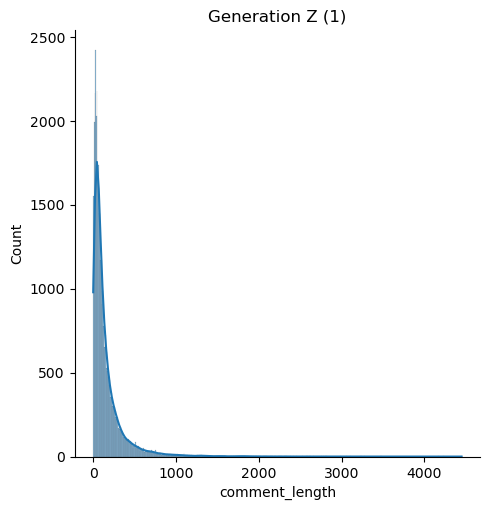

In [46]:
# Check mean, standard deviation, and distribution of 'comment_length' when 'generation_z' = 1 (generation z):
print(f"Mean: {comments[comments['generation_z'] == 1]['comment_length'].mean()}")
print(f"Standard Deviation: {comments[comments['generation_z'] == 1]['comment_length'].std()}")
sns.displot(comments[comments['generation_z'] == 1]['comment_length'], kde=True)
plt.title('Generation Z (1)')

Mean: 234.5236333657464
Standard Deviation: 291.4260431997564


Text(0.5, 1.0, 'Generation Y / Millennials (0)')

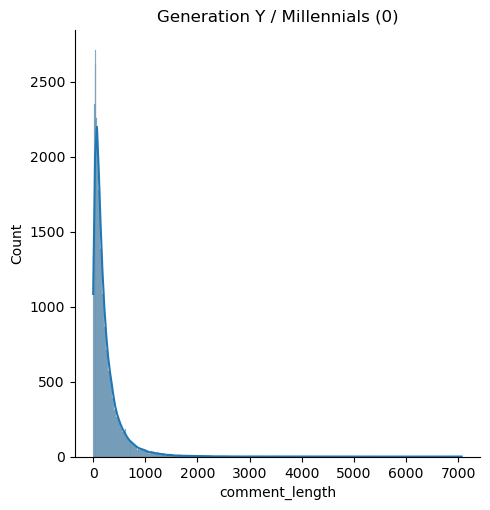

In [47]:
# Check mean, standard deviation, and distribution of 'comment_length' when 'generation_z' = 0 (generation y):
print(f"Mean: {comments[comments['generation_z'] == 0]['comment_length'].mean()}")
print(f"Standard Deviation: {comments[comments['generation_z'] == 0]['comment_length'].std()}")
sns.displot(comments[comments['generation_z'] == 0]['comment_length'], kde=True)
plt.title('Generation Y / Millennials (0)')

In [48]:
# Check longest comments by word count:
comments[['comment_text', 'comment_word_count', 'generation_z']].sort_values('comment_word_count', ascending=False).head()

,comment_text,comment_word_count,generation_z
29559,The issue with uprisings is that it requires a majority of the general population to be in agreement That's only one side of it and frankly it doesn't even need to be a majority Just a large enough proportion to be very disruptive to the rest The issue is primarily rooted in two areas Time Level of discomfort Time is a tough one People are working themselves to death to barel...,1399,0
58283,Hijacking your comment to post a thorough explanation on how the US is pretty good statistically Let's see how the third world country USA compares to other countries To do this I will be looking using fellow G countries who are undoubtedly among the best countries in the world This will be Canada France Germany Italy Japan and the U K These countries are also much better compari...,1281,1
37963,Seems like a small study that doesn't necessarily jive with findings in previous studies I'm also not exercising while wearing an N I'm usually quite sedentary when I'm wearing one and I don't generally wear one outside Methodology Questioned However US researcher Erik Van Iterson PhD who conducted a previous study that did not find any clinically meaningful physiologic effec...,1188,0
20534,Yes I was a recently confirmed Catholic in college who went hard in the paint into left wing ideologies Legalize all substances nationalize Healthcare and post high school education minimum wage should be higher universal basic income literally dissolve the military LGBTQIA rights abolish death penalty unionize all jobs government fund of arts relax requirements on voting ID an...,1136,0
31913,I'm married when my birth control failed at we chose termination I was sad I felt like a failure that I wasn't mentally financially or physically in place to keep it Now years later I know we made the right choice for our life circumstances We'd be in over our heads with no support system Our family village is toxic narcissistic selfish and greedy I hadn't even faced the real ...,1116,0


In [49]:
# Check shortest comments by word count:
comments[['comment_text', 'comment_word_count', 'generation_z']].sort_values('comment_word_count', ascending=True).head(10)

,comment_text,comment_word_count,generation_z
53173,Felt,1,1
76675,Accurate,1,1
76673,Accurate,1,1
76671,GGWP,1,1
21257,yep,1,0
76669,h,1,1
51963,Amazing,1,1
58990,dumbass,1,1
76663,gang,1,1
10350,Fr,1,0


Mean: 32.82806324110672
Standard Deviation: 48.27414668263048


Text(0.5, 1.0, 'Generation Z (1)')

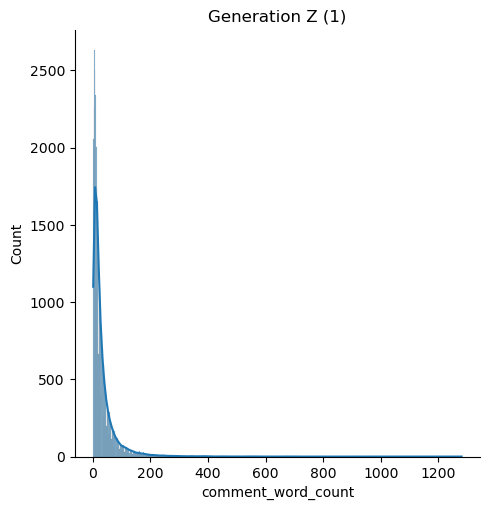

In [50]:
# Check mean and distribution of 'comment_word_count' when 'generation_z' = 1 (generation z):
print(f"Mean: {comments[comments['generation_z'] == 1]['comment_word_count'].mean()}")
print(f"Standard Deviation: {comments[comments['generation_z'] == 1]['comment_word_count'].std()}")
sns.displot(comments[comments['generation_z'] == 1]['comment_word_count'], kde=True)
plt.title('Generation Z (1)')

Mean: 50.241702955227666
Standard Deviation: 62.642764099759376


Text(0.5, 1.0, 'Generation Y / Millennials (0)')

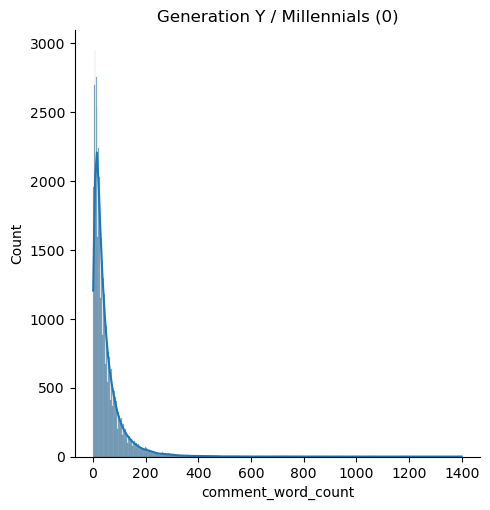

In [51]:
# Check mean and distribution of 'comment_word_count' when 'generation_z' = 0 (generation y):
print(f"Mean: {comments[comments['generation_z'] == 0]['comment_word_count'].mean()}")
print(f"Standard Deviation: {comments[comments['generation_z'] == 0]['comment_word_count'].std()}")
sns.displot(comments[comments['generation_z'] == 0]['comment_word_count'], kde=True)
plt.title('Generation Y / Millennials (0)')

### 04.01 Obervations & Findings

<details><summary> Show details: </summary>

> **Comment Length** (`comment_length`)
> - Comment lengths are of a relatively lower mean of around **158** and narrower spread with a standard deviation of **233**, with a maximum of **7065**, for **Generation Z**.
> - Comment lengths are of a relatively lower mean of around **235** and narrower spread with a standard deviation of **291**, with a maximum of **4448**, for **Millennials**.
>
> **Comment Word Count** (`comment_word_count`)
> - Comment word counts are of a relatively lower mean of around **33** and narrower spread with a standard deviation of **48**, with a maxiimum of **1399**, for **Generation Z**.
> - Comment word counts are of a relatively lower mean of around **50** and narrower spread with a standard deviation of **63**, with a maximum of **1281**, for **Millennials**.

</details>

### 04.02 Analyse Percentage of Correctly Spelled Words in Comments

In [52]:
# function to 'tokenize' comments, while not separating aprostophes

def tokenize_text(text):
    # Match words, including contractions with apostrophes
    pattern = r"\b(?:[A-Za-z]+(?:'[A-Za-z]+)?)\b"
    tokens = re.findall(pattern, text)
    return tokens

In [53]:
# function to find the percentage of correctly spelled words in a comment

def spell_checker_percentage(word_list):
    # Create an English dictionary object
    english_dict = enchant.Dict("en")

    # Count of correctly spelled words
    correct_count = len([word for word in word_list if english_dict.check(word.lower())])

    # Calculate percentage
    percentage_correct = (correct_count / len(word_list))

    return percentage_correct

In [54]:
# Millennials: Randomly select rows with strings
random_rows_mill = comments[comments['generation_z'] == 0].sample(n=5000)  # Adjust the number of rows you want to select

# generating dataframe that has original text, tokenized results, and correctly spelled percentage
result_df_mill = pd.DataFrame({
    'comment_text': random_rows_mill['comment_text'],
    'tokenised_result': random_rows_mill['comment_text'].apply(tokenize_text),
    'correct_spelled_percent': random_rows_mill['comment_text'].apply(tokenize_text).apply(spell_checker_percentage)
}).reset_index(drop=True)

In [55]:
# Gen Z: Randomly select rows with strings
random_rows_genz = comments[comments['generation_z'] == 1].sample(n=5000)  # Adjust the number of rows you want to select

# generating dataframe that has original text, tokenized results, and correctly spelled percentage
result_df_genz = pd.DataFrame({
    'comment_text': random_rows_genz['comment_text'],
    'tokenised_result': random_rows_genz['comment_text'].apply(tokenize_text),
    'correct_spelled_percent': random_rows_genz['comment_text'].apply(tokenize_text).apply(spell_checker_percentage)
}).reset_index(drop=True)

Text(0.5, 1.0, 'Millennials')

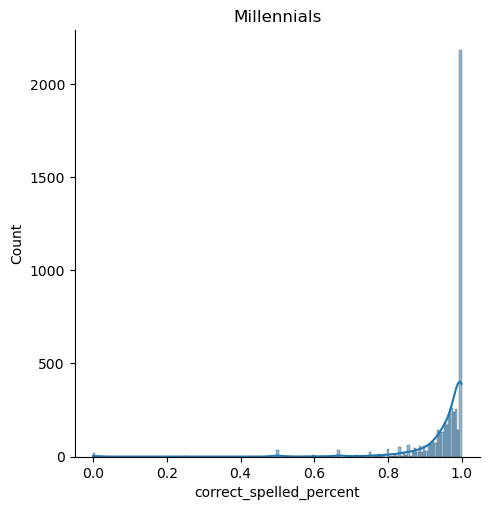

In [56]:
# plotting distribution for millennials
sns.displot(result_df_mill['correct_spelled_percent'], kde=True)
plt.title('Millennials')

Text(0.5, 1.0, 'Generation Z')

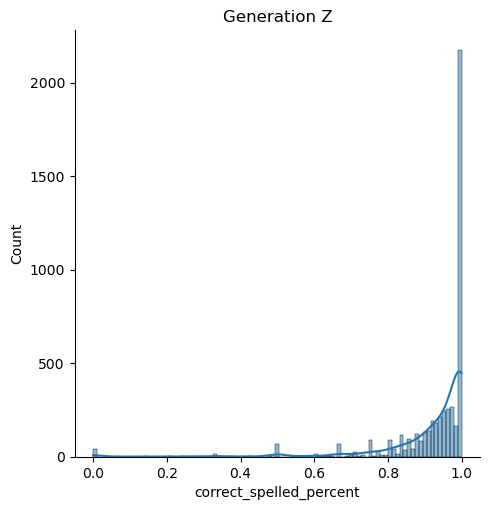

In [57]:
# plotting distribution for gen z
sns.displot(result_df_genz['correct_spelled_percent'], kde=True)
plt.title('Generation Z')

In [58]:
# Identifying percentage of Millennial having 90% of correctly spelled words
print(len(result_df_mill[result_df_mill['correct_spelled_percent'] > 0.9]) / 5000)

# Identifying percentage of gen Zs having 90% of correctly spelled words
print(len(result_df_genz[result_df_genz['correct_spelled_percent'] > 0.9]) / 5000)

0.878
0.7686


### 04.02 Obervations & Findings

<details><summary> Show details: </summary>

> To have a brief overview if there are any distinct differences between how the 2 generations place emphasis on correctly spelled words:
> - randomly sampled through 10,000 comments from each class
> - identifying the percentage of correctly spelled words in each of the comments
>
> Potential limitations: each posts have a different word lengths, percentage might be skewed for a comment with less text. Hence this analysis aims to provide just a brief outlook on any distinct differences in this area.
> Based on the distributions between the generations, both generations overall do not have much spelling errors in their comments with the high count of comments of 100% correctly spelled words. The percentage for number of comments are more skewed towards 1.0 in Millennials as compared to Gen Zs.
> Focusing on comments scoring 90% of correct spelled words, Millennials have 12% more comments of this score as compared to Gen Zs.

</details>

### 04.03 Analyse Top Words

In [59]:
# Create list of custom stop words to include common contractions:
stopwords_extra = ["they're", "doesn't", "isn't", "i've", "there's", "aren't", "i'd", "we're", "wasn't", "i'll"]
stopwords_custom = list(ENGLISH_STOP_WORDS.union(stopwords_extra))

In [60]:
# Instantiate 'TF-IDF' vectorizers for 1-gram, 2-gram, and 3-gram words:
# 1-gram:
tvec_1 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(1, 1),
                       max_df=0.03,
                       min_df=2,
                       max_features=50000)

# 2-gram:
tvec_2 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(2, 2),
                       max_df=0.03,
                       min_df=2,
                       max_features=50000)

# 3-gram:
tvec_3 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(3, 3),
                       max_df=0.03,
                       min_df=2,
                       max_features=50000)

Text(0.5, 1.0, 'Generation Z Top Words (1-gram)')

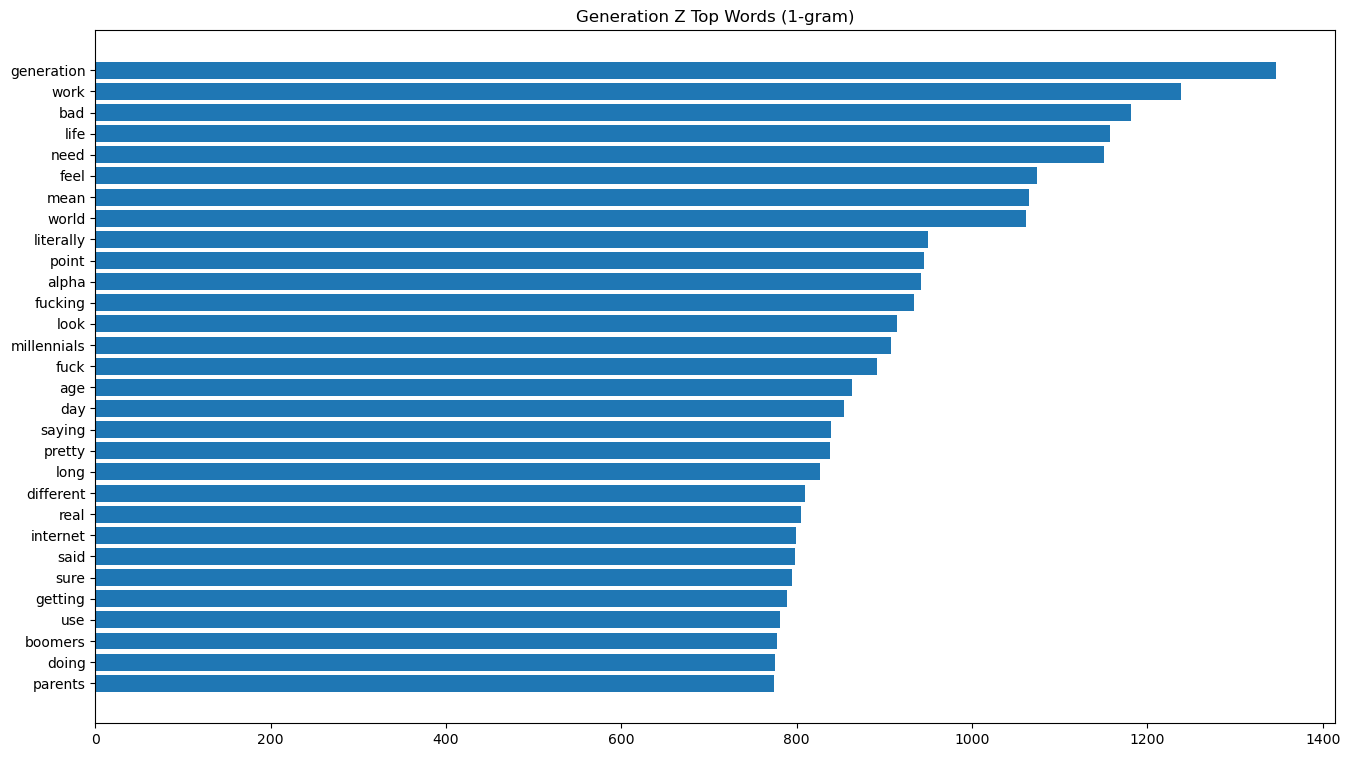

In [61]:
# Check for top occuring 1-gram words for column 'generation_z' = 1:
# Create word frequency dictionary:
comments_vec_z_1 = comments[comments['generation_z'] == 1]['comment_text']
comments_vec_z_1 = tvec_1.fit_transform(comments_vec_z_1)
comments_vec_z_1_sum = np.asarray(comments_vec_z_1.sum(axis=0)).ravel()
count_dict_z = {word: comments_vec_z_1_sum[tvec_1.vocabulary_[word]] for word in tvec_1.vocabulary_}
sorted_dict_z = {key: value for key, value in sorted(count_dict_z.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_z.keys())[:30][::-1], width=list(sorted_dict_z.values())[:30][::-1])
plt.title('Generation Z Top Words (1-gram)')

Text(0.5, 1.0, 'Generation Y Top Words (1-gram)')

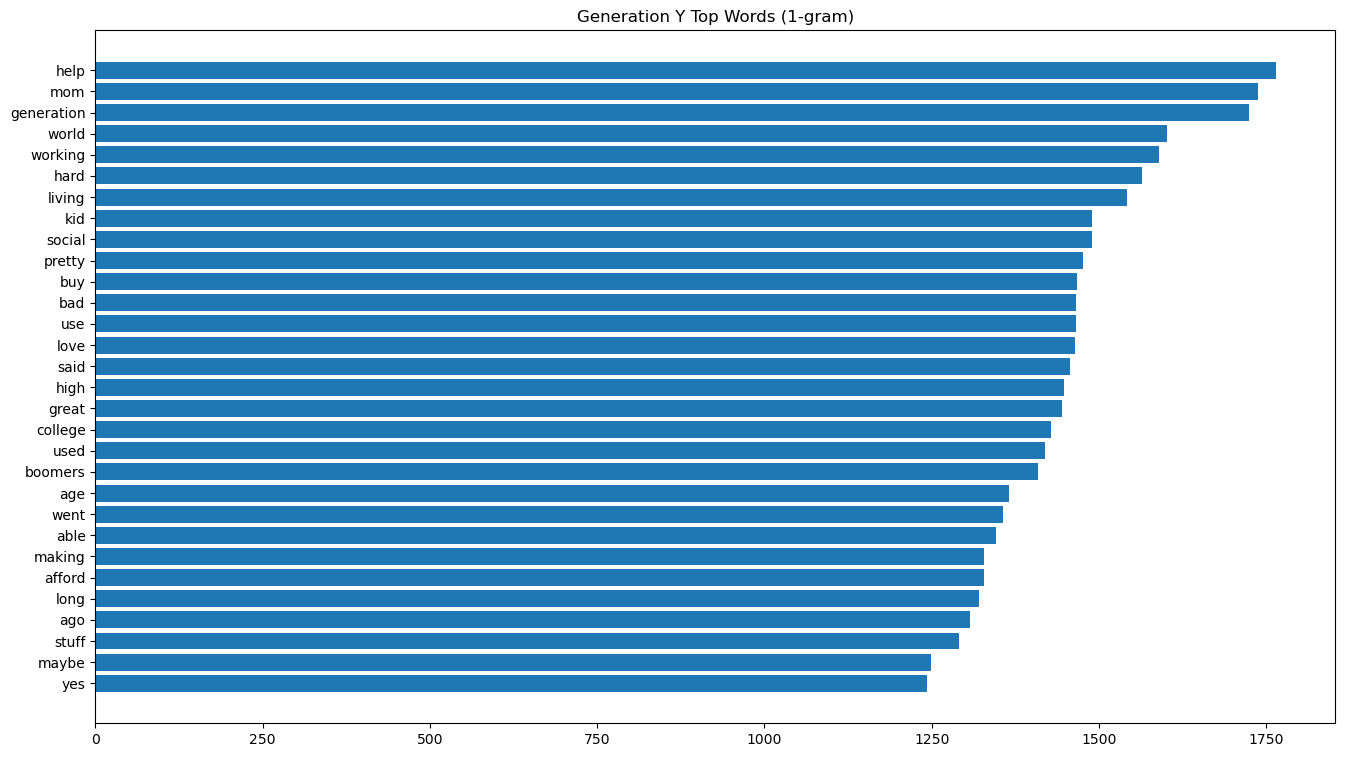

In [62]:
# Check top occuring 1-gram words for column 'generation_z' = 0:
# Create word frequency dictionary:
comments_vec_y_1 = comments[comments['generation_z'] == 0]['comment_text']
comments_vec_y_1 = tvec_1.fit_transform(comments_vec_y_1)
comments_vec_y_1_sum = np.asarray(comments_vec_y_1.sum(axis=0)).ravel()
count_dict_y = {word: comments_vec_y_1_sum[tvec_1.vocabulary_[word]] for word in tvec_1.vocabulary_}
sorted_dict_y = {key: value for key, value in sorted(count_dict_y.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_y.keys())[:30][::-1], width=list(sorted_dict_y.values())[:30][::-1])
plt.title('Generation Y Top Words (1-gram)')

Text(0.5, 1.0, 'Generation Z Top Words (2-gram)')

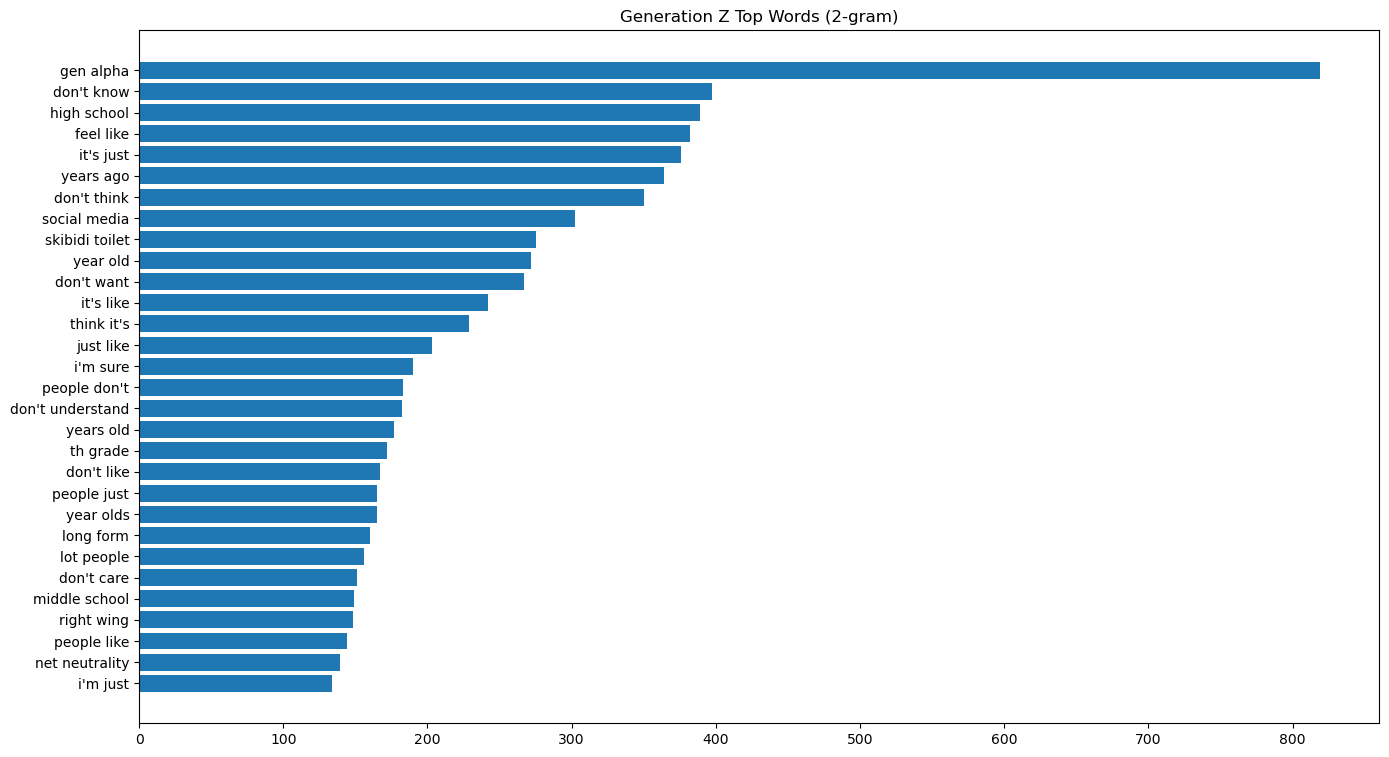

In [63]:
# Check top occuring 2-gram words for column 'generation_z' = 1:
# Create word frequency dictionary:
comments_vec_z_2 = comments[comments['generation_z'] == 1]['comment_text']
comments_vec_z_2 = tvec_2.fit_transform(comments_vec_z_2)
comments_vec_z_2_sum = np.asarray(comments_vec_z_2.sum(axis=0)).ravel()
count_dict_z = {word: comments_vec_z_2_sum[tvec_2.vocabulary_[word]] for word in tvec_2.vocabulary_}
sorted_dict_z = {key: value for key, value in sorted(count_dict_z.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_z.keys())[:30][::-1], width=list(sorted_dict_z.values())[:30][::-1])
plt.title('Generation Z Top Words (2-gram)')

Text(0.5, 1.0, 'Generation Y Top Words (2-gram)')

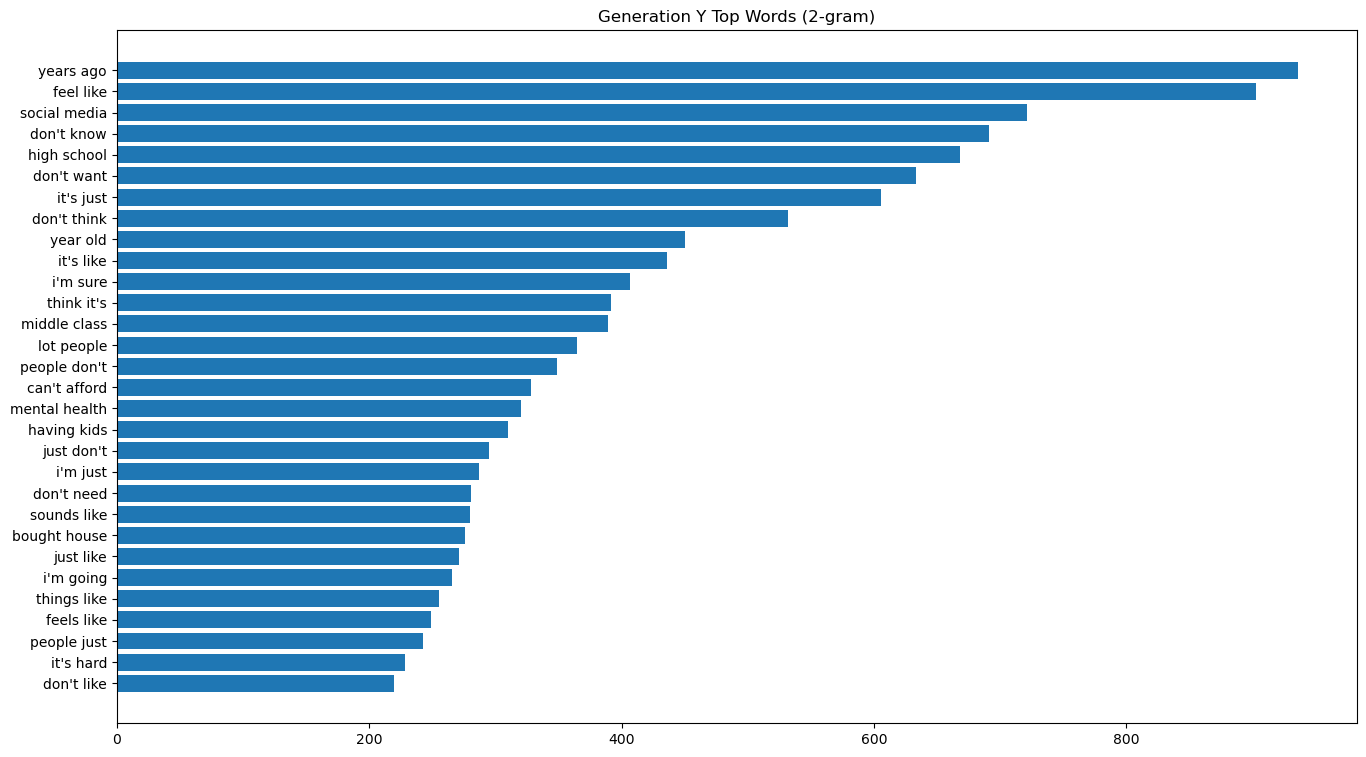

In [64]:
# Check top occuring 2-gram words for column 'generation_z' = 0:
# Create word frequency dictionary:
comments_vec_y_2 = comments[comments['generation_z'] == 0]['comment_text']
comments_vec_y_2 = tvec_2.fit_transform(comments_vec_y_2)
comments_vec_y_2_sum = np.asarray(comments_vec_y_2.sum(axis=0)).ravel()
count_dict_y = {word: comments_vec_y_2_sum[tvec_2.vocabulary_[word]] for word in tvec_2.vocabulary_}
sorted_dict_y = {key: value for key, value in sorted(count_dict_y.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_y.keys())[:30][::-1], width=list(sorted_dict_y.values())[:30][::-1])
plt.title('Generation Y Top Words (2-gram)')

Text(0.5, 1.0, 'Generation Z Top Words (3-gram)')

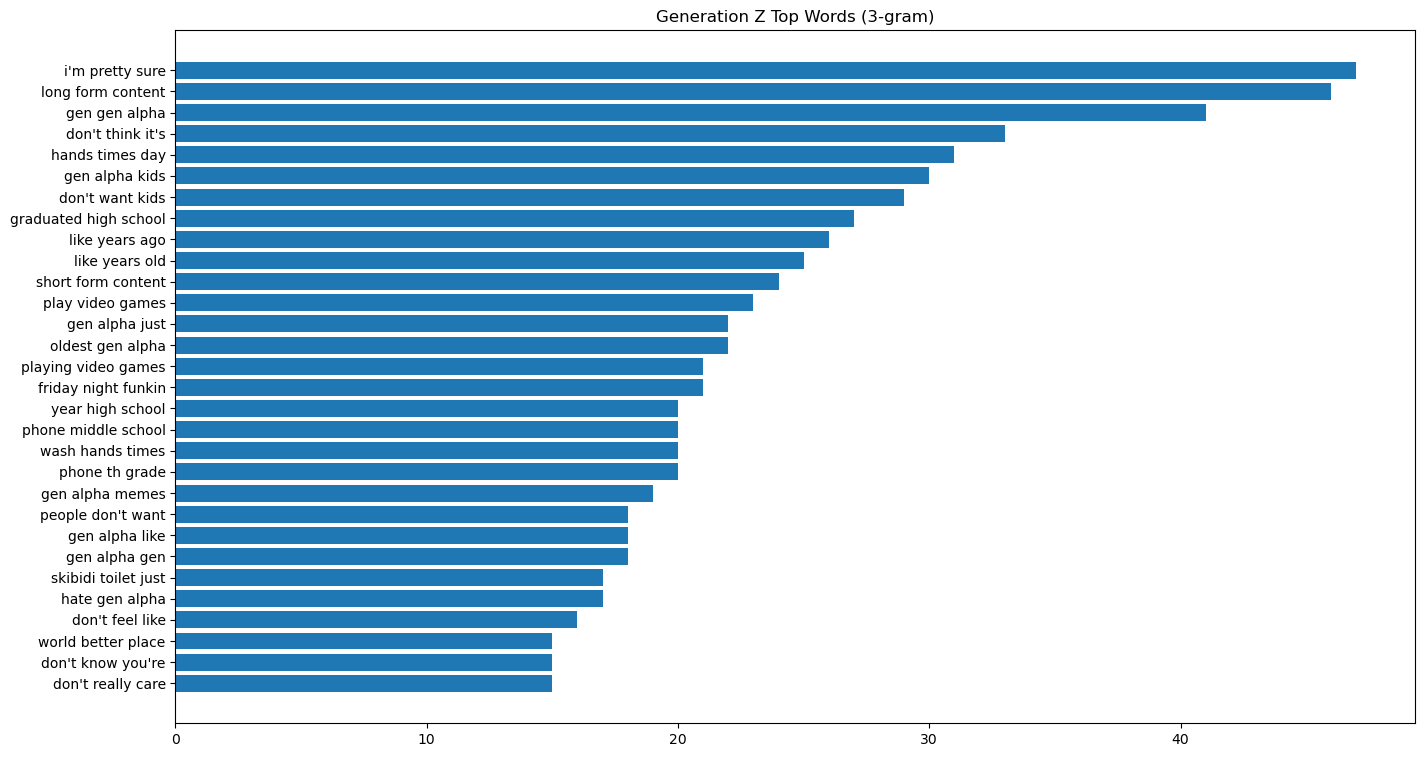

In [65]:
# Check top occuring 3-gram words for column 'generation_z' = 1:
# Create word frequency dictionary:
comments_vec_z_3 = comments[comments['generation_z'] == 1]['comment_text']
comments_vec_z_3 = tvec_3.fit_transform(comments_vec_z_3)
comments_vec_z_3_sum = np.asarray(comments_vec_z_3.sum(axis=0)).ravel()
count_dict_z = {word: comments_vec_z_3_sum[tvec_3.vocabulary_[word]] for word in tvec_3.vocabulary_}
sorted_dict_z = {key: value for key, value in sorted(count_dict_z.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_z.keys())[:30][::-1], width=list(sorted_dict_z.values())[:30][::-1])
plt.title('Generation Z Top Words (3-gram)')

Text(0.5, 1.0, 'Generation Y Top Words (3-gram)')

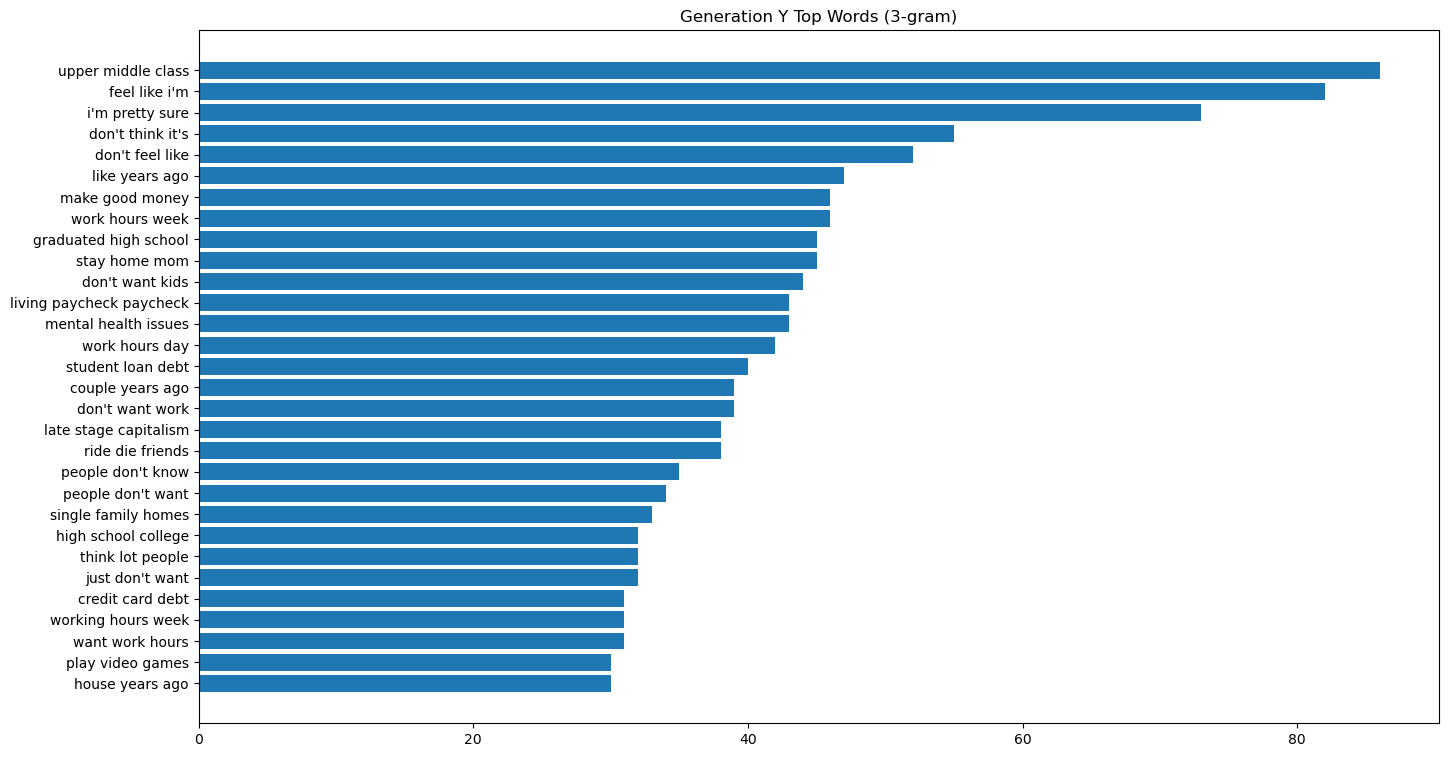

In [66]:
# Check top occuring 3-gram words for column 'generation_z' = 0:
# Create word frequency dictionary:
comments_vec_y_3 = comments[comments['generation_z'] == 0]['comment_text']
comments_vec_y_3 = tvec_3.fit_transform(comments_vec_y_3)
comments_vec_y_3_sum = np.asarray(comments_vec_y_3.sum(axis=0)).ravel()
count_dict_y = {word: comments_vec_y_3_sum[tvec_3.vocabulary_[word]] for word in tvec_3.vocabulary_}
sorted_dict_y = {key: value for key, value in sorted(count_dict_y.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_y.keys())[:30][::-1], width=list(sorted_dict_y.values())[:30][::-1])
plt.title('Generation Y Top Words (3-gram)')

### 04.03 Obervations & Findings

<details><summary> Show details: </summary>

> **Word Vectorizing**
> - The analysis of top words will focus on **key words**, which are defined as words that have direct interpretive value related to the liftstyles of people from either **Generation Z** or **Millennials**.
> - 1-gram, 2-gram, and 3-gram will be the focus of this analysis.
> - Word vectorizing was done specifically for 1-gram, 2-gram, and 3-gram words since 1-gram words dominate with the highest frequency, allowing for unique 2-gram and 3-gram words to be analysed as well.
> - Maximum Document Freqeuncy (`max_df`) set consisitently at 3% to filter out commonly used words to detect unique key words for both groups, especially for 1-gram words.
>
> **Top Words**
> - Unique key words observed for each group across 1-gram, 2-gram, and 3-gram words.
> - 1-gram words tend to be very simmilar, with similar top key words such as **'boomer'**, a generation term.
> - 2-gram words are relatively less similar than 1-gram words, with similar top key words such as **'social media'**, and different top key words such as **'net neutrality'** for **Generation Z**, a term about internet freedom, and **'mental health'** for **Millennials**.
> - 3-gram words are even less similar and most telling of lifestyle, with different top key words such as **'playing video games'** for **Generation Z**, and **'living paycheck paycheck'** for **Millennials**, a phrase that was likely **'living paycheck to paycheck'** before removing stop words.

</details>

## 05 Export Data

In [67]:
# Redefine data frame 'comments':
comments = comments[['thread_id', 'comment_id', 'comment_text', 'comment_length', 'comment_word_count', 'generation_z']]

In [68]:
# Create output folder and export data frame 'comments' as 'comments_2.csv':
if not os.path.exists('../data'):
    os.makedirs('data')
comments.to_csv('../data/comments_2.csv', index=False)